Program paused. Press ENTER to continue
Cost at initial theta (zeros): 0.6931471805599454
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only: 
[ 0.0085
  0.0188
  0.0001
  0.0503
  0.0115
]
Expected gradients (approx) - first five values only: 
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115
Program paused. Press ENTER to continue
Cost at test theta: 2.13908560280145
Expected cost (approx): 2.13
Gradient at test theta - first five values only: 
[ 0.3545
  0.0851
  0.1185
  0.1506
  0.0159
]
Expected gradients (approx) - first five values only: 
 0.3460
 0.0851
 0.1185
 0.1506
 0.0159
Program paused. Press ENTER to continue
Plotting decision boundary ...
Train Accuracy: 0.0000
Expected accuracy (with lambda = 1): 83.1 (approx)
ex2_reg Finished. Press ENTER to exit


''

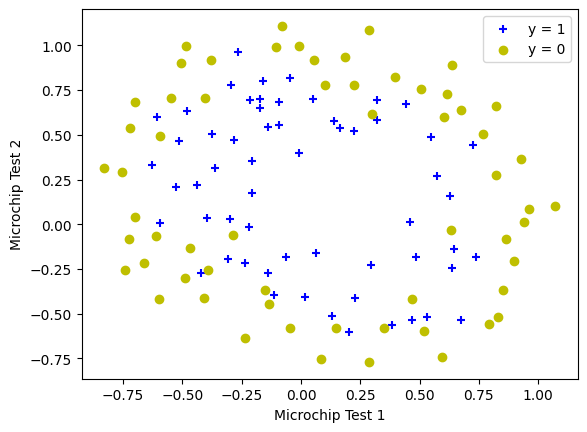

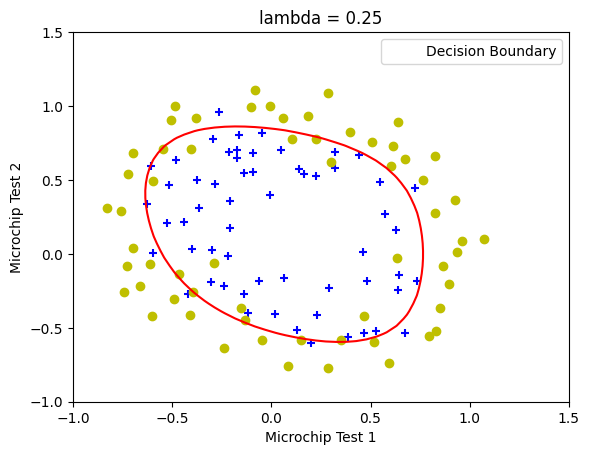

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from plotData import *
import costFunctionReg as cfr
import plotDecisionBoundary as pdb
import predict as predict
import mapFeature as mf

plt.ion()
# Load data
# The first two columns contain the exam scores and the third column contains the label.
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

plot_data(X, y)

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])

input('Program paused. Press ENTER to continue')

# ===================== Part 1: Regularized Logistic Regression =====================
# In this part, you are given a dataset with data points that are not
# linearly separable. However, you would still like to use logistic
# regression to classify the data points.

# To do so, you introduce more feature to use -- in particular, you add
# polynomial features to our data matrix (similar to polynomial regression)
#

# Add polynomial features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mf.map_feature(X[:, 0], X[:, 1])

# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
lmd = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = cfr.cost_function_reg(initial_theta, X, y, lmd)

np.set_printoptions(formatter={'float': '{: 0.4f}\n'.format})
print('Cost at initial theta (zeros): {}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only: \n{}'.format(grad[0:5]))
print('Expected gradients (approx) - first five values only: \n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

input('Program paused. Press ENTER to continue')

# Compute and display cost and gradient with non-zero theta
test_theta = np.ones(X.shape[1])

cost, grad = cfr.cost_function_reg(test_theta, X, y, lmd)

print('Cost at test theta: {}'.format(cost))
print('Expected cost (approx): 2.13')
print('Gradient at test theta - first five values only: \n{}'.format(grad[0:5]))
print('Expected gradients (approx) - first five values only: \n 0.3460\n 0.0851\n 0.1185\n 0.1506\n 0.0159')

input('Program paused. Press ENTER to continue')

# ===================== Part 2: Regularization and Accuracies =====================
# Optional Exercise:
# In this part, you will get to try different values of lambda and
# see how regularization affects the decision boundary
#
# Try the following values of lambda (0, 1, 10, 100).
#
# How does the decision boundary change when you vary lambda? How does
# the training set accuracy vary?
#

# Initializa fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lmd = 0.25

# Optimize
def cost_func(t):
    return cfr.cost_function_reg(t, X, y, lmd)[0]

def grad_func(t):
    return cfr.cost_function_reg(t, X, y, lmd)[1]

theta, cost, *unused = opt.fmin_bfgs(f=cost_func, fprime=grad_func, x0=initial_theta, maxiter=400, full_output=True, disp=False)

# Plot boundary
print('Plotting decision boundary ...')
pdb.plot_decision_boundary(theta, X, y)
plt.title('lambda = {}'.format(lmd))

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Compute accuracy on our training set
p = predict.predict(theta, X)

print('Train Accuracy: {:0.4f}'.format(np.mean(y == p) * 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)')

input('ex2_reg Finished. Press ENTER to exit')
